# Our Dataset

## Dataset_Summary

In [2]:
#import libraries
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv('mammographyS7.csv')
df

,Area,Grey Level,Gradient Strength,Noise Fluctuation,Contrast,Shape Descriptor,Microcalcifications
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,'-1'
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,'-1'
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,'-1'
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,'-1'
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,'-1'
...,...,...,...,...,...,...,...
11178,-0.250012,-0.377300,-0.321142,1.269157,3.652984,1.092791,'1'
11179,0.281343,-0.417112,-0.366224,0.851010,2.789649,1.345700,'1'
11180,1.204988,1.763724,-0.501468,1.562408,6.489072,0.931294,'1'
11181,0.736644,-0.222474,-0.050653,1.509665,0.539269,1.315229,'1'


## Visualizing Data

### Imbalanced Data

The pie chart below confirms that our dataset has a severe class imbalance, with 98% of the observations belonging to the majority class (non-microcalcifications) and only 2%  belonging to the minority class (microcalcifications).

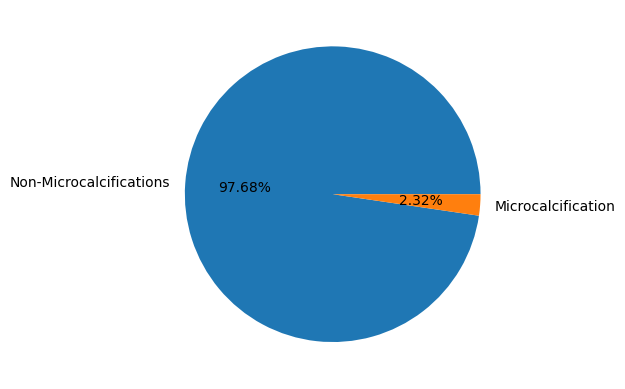

In [ ]:
#let's draw a pie chart to visualize the distribution of the two classes

# Create an instance of the LabelEncoder to convert the target variable into numeric values
encoder=LabelEncoder()

# Encode the target variable 'Microcalcifications' into binary values (0,1)
df['Microcalcifications']=encoder.fit_transform(df['Microcalcifications'])

# Count the number of samples in each class and store them in a list
x=df['Microcalcifications'].value_counts().to_list()
labels=['Non-Microcalcifications','Microcalcification']

# Create a pie chart with the data, labels, percentage values and start angle of 0 degrees
plt.pie(x,labels=labels,autopct='%1.2f%%',startangle=0);

###### Interpretation  & Conclusion

We will be working on imbalanced classification.

### Correlation matrix

We will calculate the correlation between different variables in a data set. It is a way to measure how related one variable is to another variable. The output of the statement below is a correlation matrix, which is a table showing the correlation coefficient between each pair of variables.

In [ ]:
# Create a correlation matrix of the DataFrame using the .corr() method
# Correlation measures the strength of the linear relationship between two variables
corr=df.corr()
corr

,Area,Grey Level,Gradient Strength,Noise Fluctuation,Contrast,Shape Descriptor,Microcalcifications
Area,1.000000,0.401205,0.019329,0.296330,0.121622,0.196630,0.119547
Grey Level,0.401205,1.000000,0.015448,0.258984,0.021408,0.146379,-0.018092
Gradient Strength,0.019329,0.015448,1.000000,0.220777,0.005885,0.277189,-0.047275
Noise Fluctuation,0.296330,0.258984,0.220777,1.000000,0.406464,0.867821,0.257561
Contrast,0.121622,0.021408,0.005885,0.406464,1.000000,0.404119,0.472887
Shape Descriptor,0.196630,0.146379,0.277189,0.867821,0.404119,1.000000,0.168960
Microcalcifications,0.119547,-0.018092,-0.047275,0.257561,0.472887,0.168960,1.000000


<Axes: >

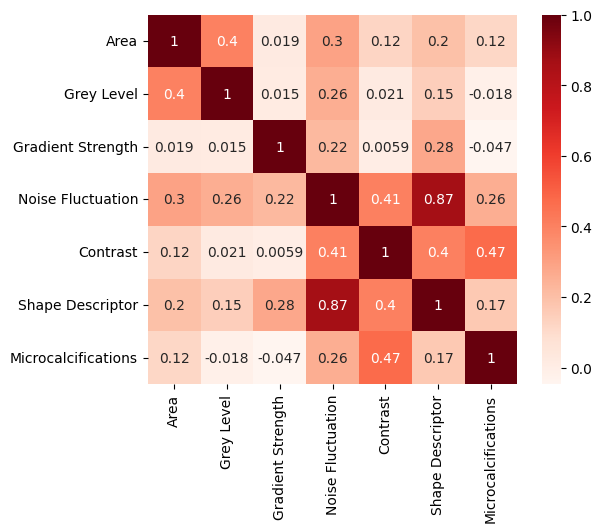

In [ ]:
#Visualize our correlation matrix

plt.figsize=(8,6)

# Create a heatmap of the correlation matrix using seaborn
sns.heatmap(corr,square=True,annot=True,cmap='Reds')


###### Interpretation  & Conclusion

The correlation matrix shows that there is no linear relationship between the features, so we need to use more complex models such as SVM or RF ( which we will explain later on) to detect any relationships between them.

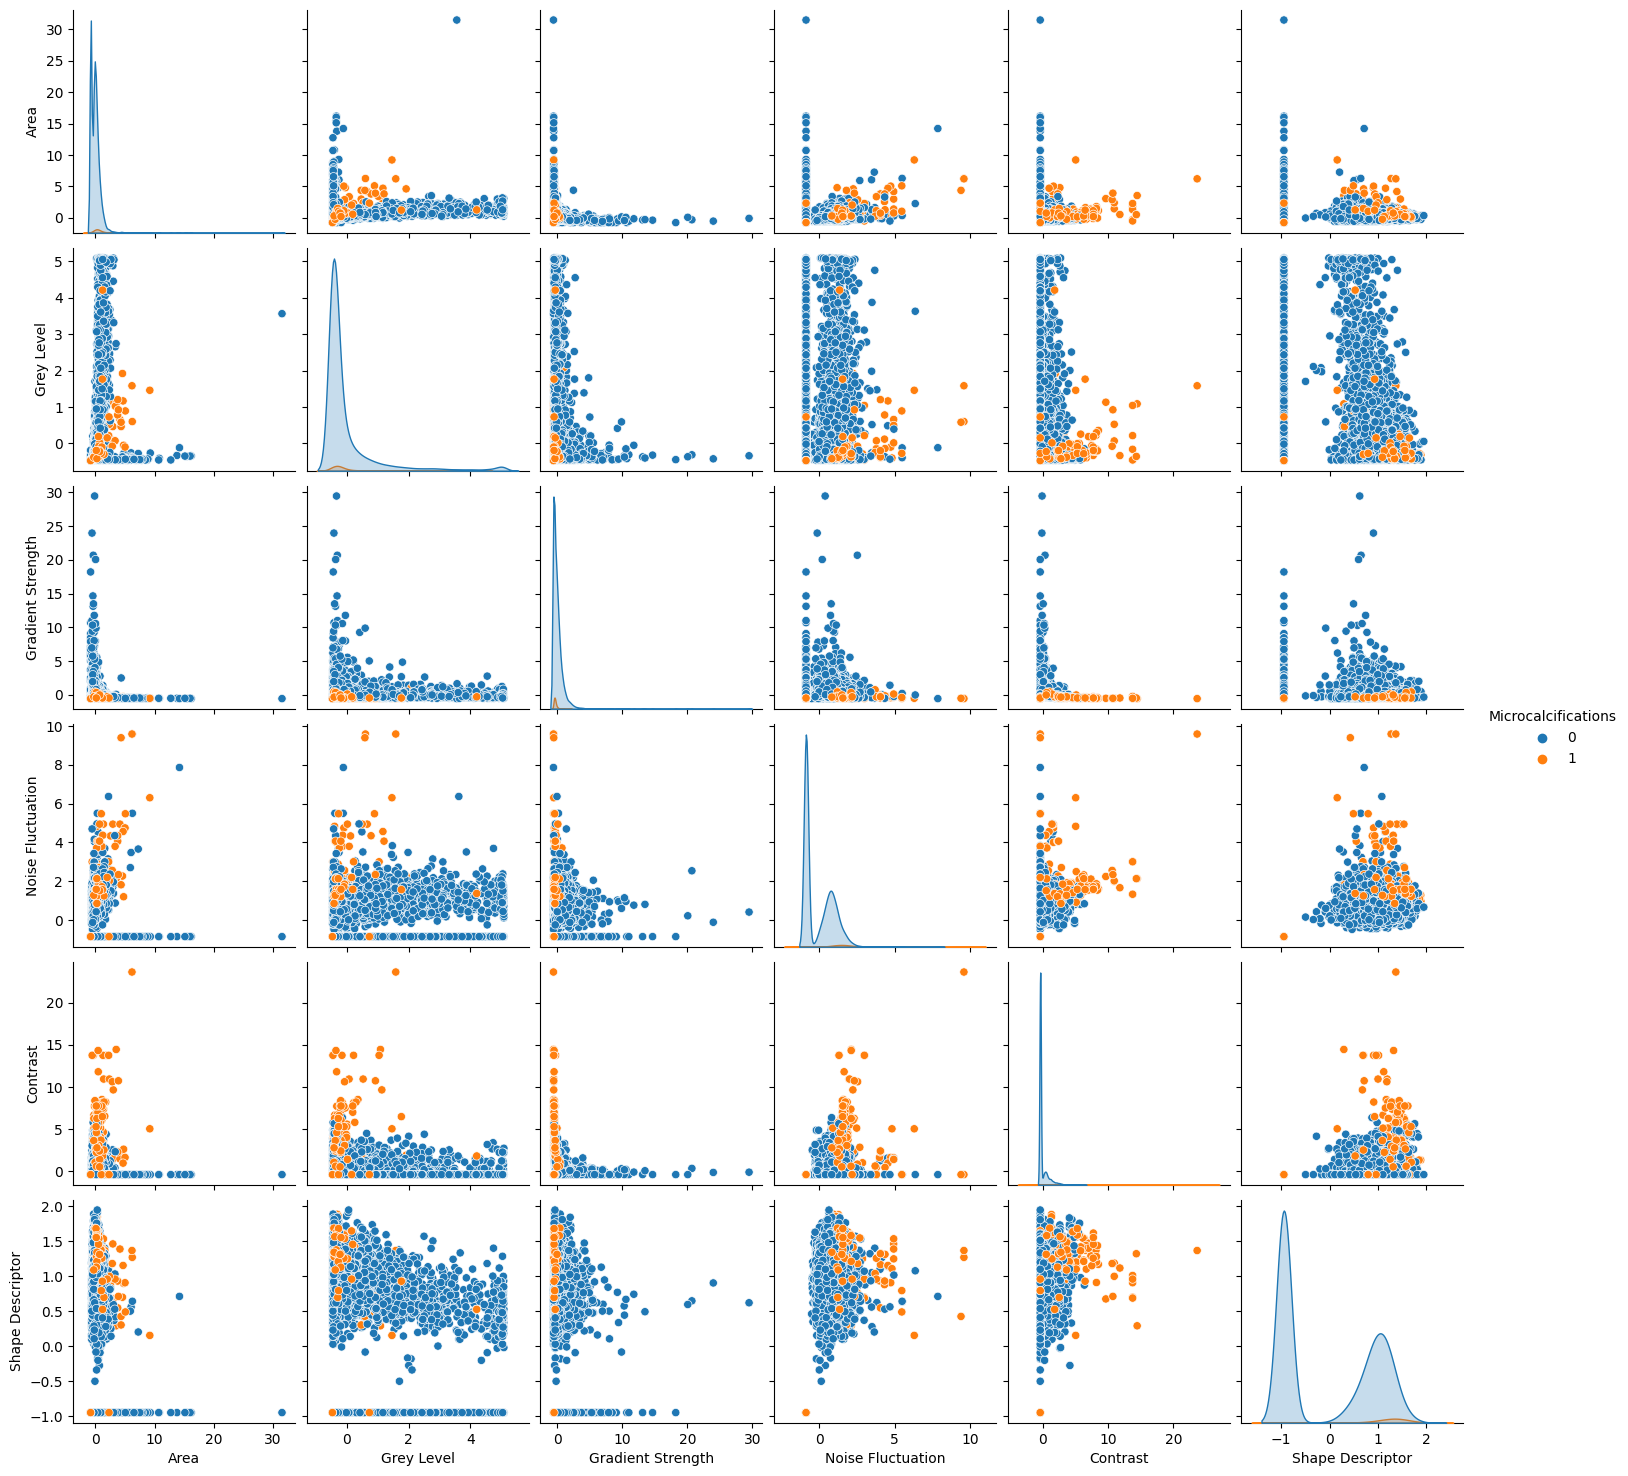

In [ ]:
#This helps us visualize the relationship between different features and
#how they relate to the target variable.
select=['Area','Grey Level','Gradient Strength', 'Noise Fluctuation', 'Contrast', 'Shape Descriptor', 'Microcalcifications']
sns.pairplot(df[select],hue='Microcalcifications');
#0 : non-microcalcifications
#1 : microcalcifications

###### Interpretation  & Conclusion

The diagonal of the matrix illustrates the density distribution for each variable, with the same pairings appearing twice on either side of the top-left to bottom-right diagonal, providing two ways to view the interactions between the variables. The distributions for various variables vary between the two-class labels, indicating that it is likely possible to discriminate between microcalcifications and non-microcalcifications cases.

# Processing

## Preparing dataset

In [ ]:
#Preparing dataset (features/ target_variables)

X=df.drop('Microcalcifications',axis=1)
y=df['Microcalcifications']

Splitting data into training and testing sets is an important part of the ML process. The primary purpose of splitting data into a training and testing set is to prevent overfitting and obtain an accurate measure of the performance of the model on unseen data. This helps to ensure that the model is not overly tailored to the training data and that it can generalize to new, unseen data. Additionally, it can be used to validate and tune hyperparameters.

In [ ]:
#Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
X_test.shape

(2237, 6)

In [ ]:
X_train.shape

(8946, 6)

Since we have given 20% as ou test_size, 2237 samples are used for testing and 8946 are used for training.

# Algorithm Spot Checking

## Before Cost-sensitive

As mentionned earlier the correlation matrix shows that there is no linear relationship between the features, so we need to use more complex models such as SVM or RF to detect any relationships between them.

- SVM (Support Vector Machines):

Support Vector Machines (SVM) is a supervised machine learning algorithm for both classification and regression tasks. It is a powerful and versatile technique that has gained popularity in recent years. It works by constructing hyperplanes in a high-dimensional space that can be used to separate classes of data. The hyperparameters of SVM are:

1. Kernel: The kernel is a function that the SVM algorithm uses to transform the data into a higher dimensional space to allow for a better decision boundary separation.Common types of kernels include linear, polynomial, radial basis function (RBF), and sigmoid.
2. Cost: The cost is a parameter that determines how much the model should penalize a misclassified training example.
3. Gamma: Gamma is a parameter that defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.


- RF (Random Forest):

Random forest is a supervised machine learning algorithm which is used for both classification and regression tasks. It is an ensemble technique that uses multiple decision trees to make predictions. The decision trees are trained using a combination of a randomly selected set of features and data points. The predictions of the individual trees are combined to form an overall consensus prediction. And the hyperparameters of RF are :

1. Number of decision trees: This parameter controls the number of decision trees that will be used in the ensemble.
2. Maximum depth of trees: This parameter controls the maximum depth of each decision tree.
3. Minimum number of samples per leaf: This parameter controls the minimum number of samples that are required to be present in a leaf node in order to be considered for splitting.

### SVM: Grid search over the hyperparameters.

GridSearchCV is an algorithm that performs an exhaustive search over a specified parameter grid, evaluating the performance of the classifier with each combination of hyperparameters.

In [ ]:

# Setting the hyperparameters
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid')}

# Creating the model
svc = SVC()

# Creating the grid search object
clf = GridSearchCV(svc, parameters)

# Fitting the grid search to the data
clf.fit(X, y)

# Viewing the best parameters
print('The best hyperparameter is:', clf.best_params_)

The best hyperparameter is: {'kernel': 'poly'}


### RF : Grid search over the hyperparameters.

In [ ]:
#define the parameter grid to be used in the grid search
param_grid = {
    'n_estimators': [100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

#Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

#Instantiate the GridSearchCV object with the parameter grid and the RandomForestClassifier
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv = 3)

#fit the model on the training data
grid_search.fit(X_train, y_train)

#Print the best parameters as identified by the GridSearch
print(grid_search.best_params_)

#Predict the labels of the test dataset
y_pred = grid_search.predict(X_test) # we will focus on n_estimators

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}


### **Evaluation** **Metrics**

- Accuracy:

Accuracy is a measure of how close a model’s predicted values are to actual values. It is calculated by: Accuracy = (TP + TN)/(TP + TN + FP + FN)

- Precision:

Precision measures how accurate a model's predictions are within a certain range. It is calculated by: Precision = TP/(TP + FP)

- F1 Score:

The F1 score is a measure of a model’s accuracy and precision. It is calculated by taking the harmonic mean of precision and recall: F1 Score = 2\*\((Precision\*Recall)/(Precision + Recall))

- Recall:

Recall measures a model’s ability to identify all relevant instances. It is calculated by dividing the number of true positives by the sum of true positives and false negatives. Recall = TP/(TP + FN)

### SVM: Evaluation Metrics

In [ ]:
#Evaluation Metrics for kernel= polynomial

model_01 = svm.SVC(kernel = 'poly', gamma='auto', C=0.3)

model_01.fit(X_train, y_train)

y_predicted_01=model_01.predict(X_test)


In [ ]:
print(classification_report(y_test, y_predicted_01))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2185
           1       0.88      0.42      0.57        52

    accuracy                           0.99      2237
   macro avg       0.93      0.71      0.78      2237
weighted avg       0.98      0.99      0.98      2237



###### Interpretation  & Conclusion

- The SVM with Polynomial Kernel has an accuracy of 99% in detecting microcalcifications in mammography. It has a precision of 99% for class 0 (non-microcalcifications) and 88% for class 1 (microcalcifications). The recall for class 0 is 100% and for class 1 is 42%. The F1-score for class 0 is 99% and for class 1 is 57%.

- Accuracy can be a misleading metric for evaluating SVM for imbalanced classification because it does not take into account the true positives, false positives, true negatives, or false negatives. It simply measures the ratio of correct predictions to the total number of predictions. In fact, this model gave a very high accuracy score (99%) even though it is favoring the majority class and making very few correct predictions for the minority class. This can lead to poor performance on the minority class and ultimately poor overall performance on the dataset.

-  Standard support vector machine algorithm is limited for imbalanced classification.

### RF: Evaluation Metrics

In [ ]:
# create, train and fit the random forest model
rf = RandomForestClassifier(n_estimators=100) #'n_estimators' is the number of trees in the forest.
rf.fit(X_train, y_train)

# predict the values and store them in y_pred
y_predicted_02 = rf.predict(X_test)


print(classification_report(y_test, y_predicted_02))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2185
           1       0.87      0.50      0.63        52

    accuracy                           0.99      2237
   macro avg       0.93      0.75      0.81      2237
weighted avg       0.99      0.99      0.98      2237



###### Interpretation  & Conclusion

The results of the RF model is the relatively better than SVM, as it has a higher preciosion , recall and f1-score for both classes.

### After Cost-sensitive

We opt for the cost-sensitive technique instead of undersampling or oversampling methods to ensure the preservation of our data.

#### SVM

Cost-sensitive algorithms are referred to as cost-sensitive machine learning models and they can be used for imbalanced classification by specifying a cost that is inversely proportional to the class distribution. For example, with a 98 percent to 2 percent distribution for the majority and minority classes, we can specify to give errors on the minority class a weighting of 98 and errors for the majority class a weighting of 2.

This can be achieved in scikit-learn by setting the “class_weight” argument to “balanced” to make these algorithms cost-sensitive.

In [ ]:
model22 = SVC(gamma='scale', class_weight='balanced')

# svm theory
#we don wanna  change data : cost-sensitive
#before-after cost sensitive
#same goes for rf
model22.fit(X_train, y_train)

y_predsvm=model22.predict(X_test)

# Evaluating : SVM (Before/After) Cost-sensitive

Text(95.72222222222221, 0.5, 'True Label')

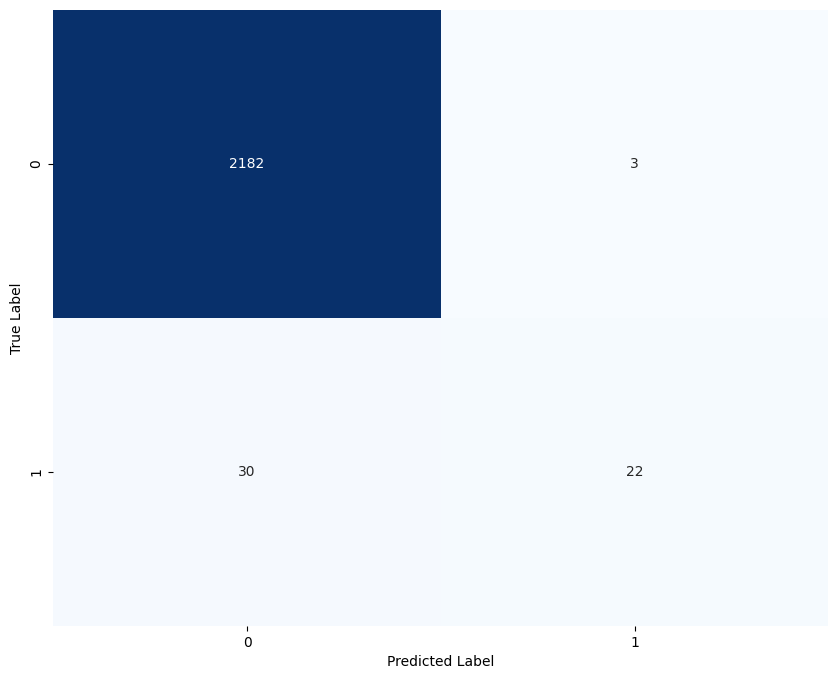

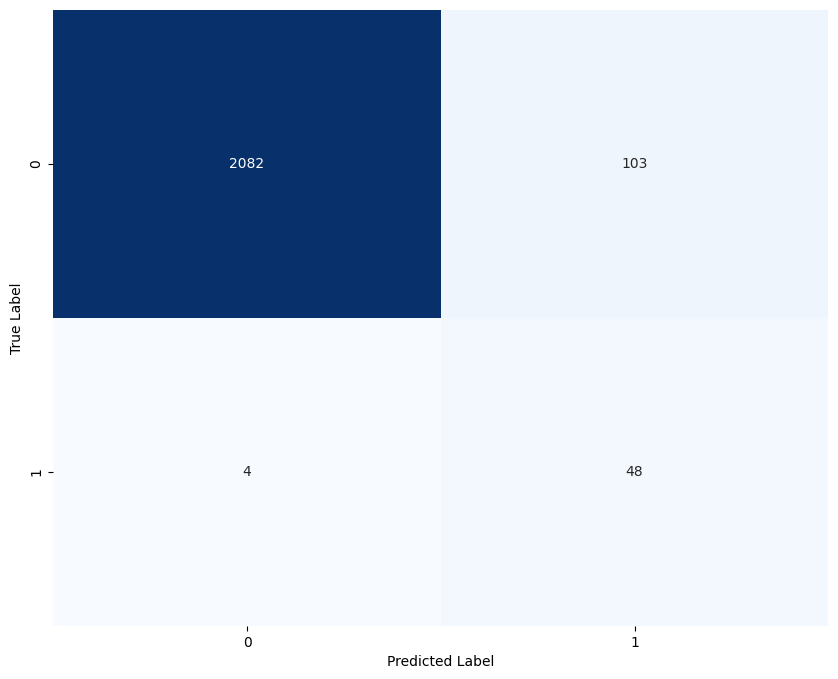

In [ ]:

#Confusion metrix for svm before cost sensitive
val=['0','1']

data = pd.DataFrame((confusion_matrix(y_test, y_predicted_01)), columns=val, index=val)
plt.figure(figsize=(10,8))

sns.heatmap(data,annot=True,cbar=False,cmap='Blues',fmt='g');
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


#Confusion metrix for svm after cost sensitive
val=['0','1']

datanew = pd.DataFrame((confusion_matrix(y_test, y_predsvm)), columns=val, index=val)
plt.figure(figsize=(10,8))

sns.heatmap(datanew,annot=True,cbar=False,cmap='Blues',fmt='g');
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

The second confusion matrix  (svm after cost-sensitive technique) indicates that the model correctly predicted 2082 true positive cases, 103 false negative cases, 4 false positive cases, and 48 true negative cases. The model correctly identified 95.9% of the positive cases and 92.2% of the negative cases.

The second confusion matrix  (svm before cost-sensitive technique) indicates that the model correctly predicted 2180 true positive cases, 3 false negative cases, 30 false positive cases, and 48 true negative cases. The model correctly identified 98.7% of the positive cases and 50.0% of the negative cases.

We can conclude that the second model performed better overall in terms of correctly identifying both positive and negative cases.

Overall, it appears that applying the cost-sensitive technique improved the performance of the SVM model in this particular case.


# Evaluating : RF (Before/After) Cost-sensitive

#### RF

In [ ]:
model11= RandomForestClassifier(class_weight="balanced_subsample")

model11.fit(X_train, y_train)

y_predrf=model11.predict(X_test)

Text(95.72222222222221, 0.5, 'True Label')

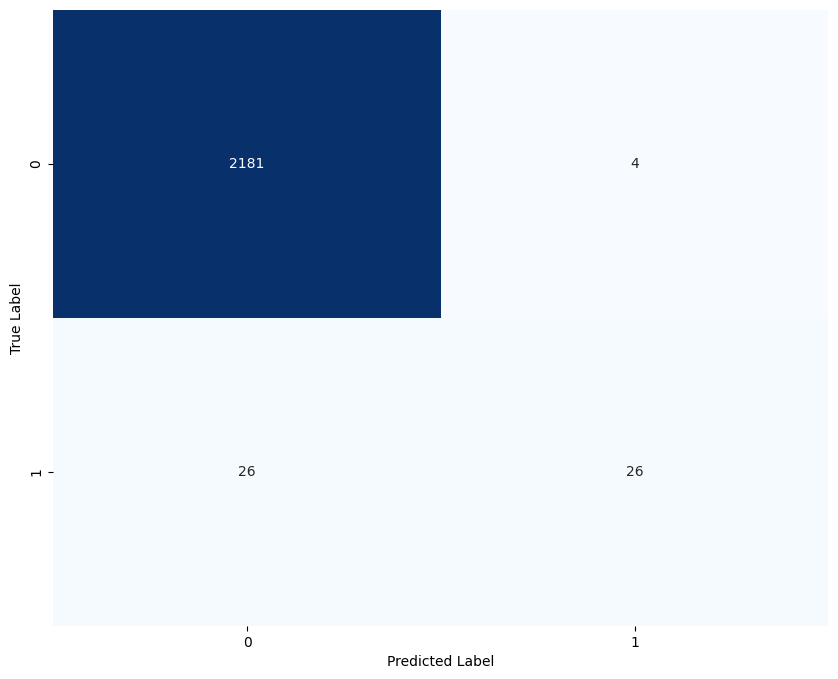

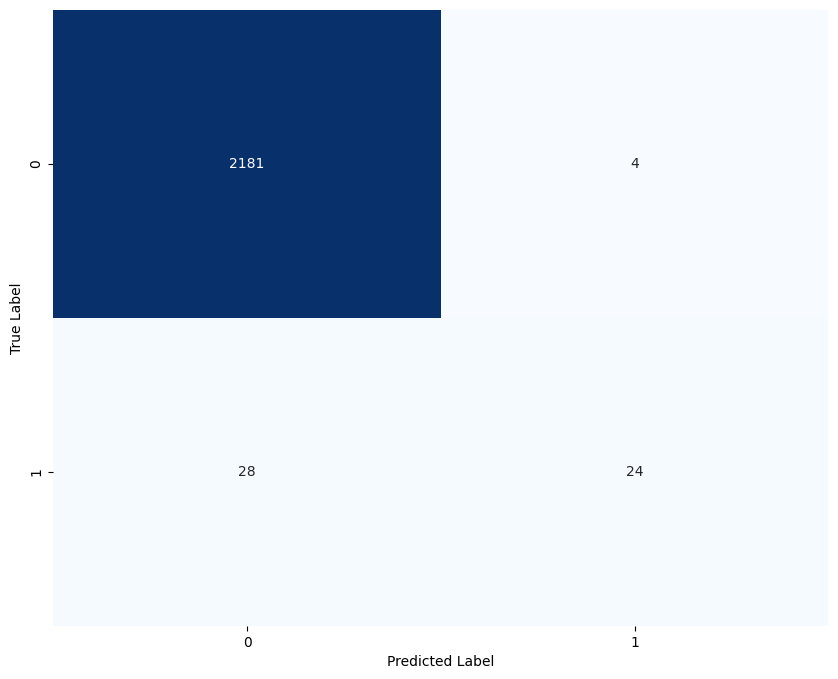

In [ ]:

#Confusion metrix for rf before cost sensitive
val=['0','1']

datanew = pd.DataFrame((confusion_matrix(y_test, y_predicted_02)), columns=val, index=val)
plt.figure(figsize=(10,8))

sns.heatmap(datanew,annot=True,cbar=False,cmap='Blues',fmt='g');
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


#Confusion metrix for rf after cost sensitive
val=['0','1']

datanewb = pd.DataFrame((confusion_matrix(y_test, y_predrf)), columns=val, index=val)
plt.figure(figsize=(10,8))

sns.heatmap(datanewb,annot=True,cbar=False,cmap='Blues',fmt='g');
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


In the second confusion matrix, there were 2180 true positive cases and 5 false negative cases, but there were only 26 false positive cases and 26 true negative cases. This suggests that the model again correctly identified the majority of microcalcifications and had a slightly lower false positive rate, only incorrectly identifying 26 non-microcalcifications as positive.

Based on this information, it seems that the second confusion matrix represents a slightly better performance of the model in detecting microcalcifications, as it has a slightly lower false positive rate compared to the first confusion matrix.

# Conclusion

In [ ]:
print(classification_report(y_test, y_predsvm)) #SVM
print(classification_report(y_test, y_predrf)) #RF

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2185
           1       0.32      0.92      0.47        52

    accuracy                           0.95      2237
   macro avg       0.66      0.94      0.72      2237
weighted avg       0.98      0.95      0.96      2237

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2185
           1       0.83      0.48      0.61        52

    accuracy                           0.99      2237
   macro avg       0.91      0.74      0.80      2237
weighted avg       0.98      0.99      0.98      2237



- From the above comparison, it can be seen that the Random Forest model (after cost-sensitive technique) performs better than the SVM model (after cost-sensitive technique) for the detection of microcalcifications in mammography. This is because the Random Forest model has a much higher precision and f1score for class 1 (indicating a better balance between precision and recall), compared to the SVM model, indicating that the Random Forest model is able to more accurately detect microcalcifications in mammography.

- However, it still has room for improvement, especially in terms of recall, which is relatively low.